#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 28 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


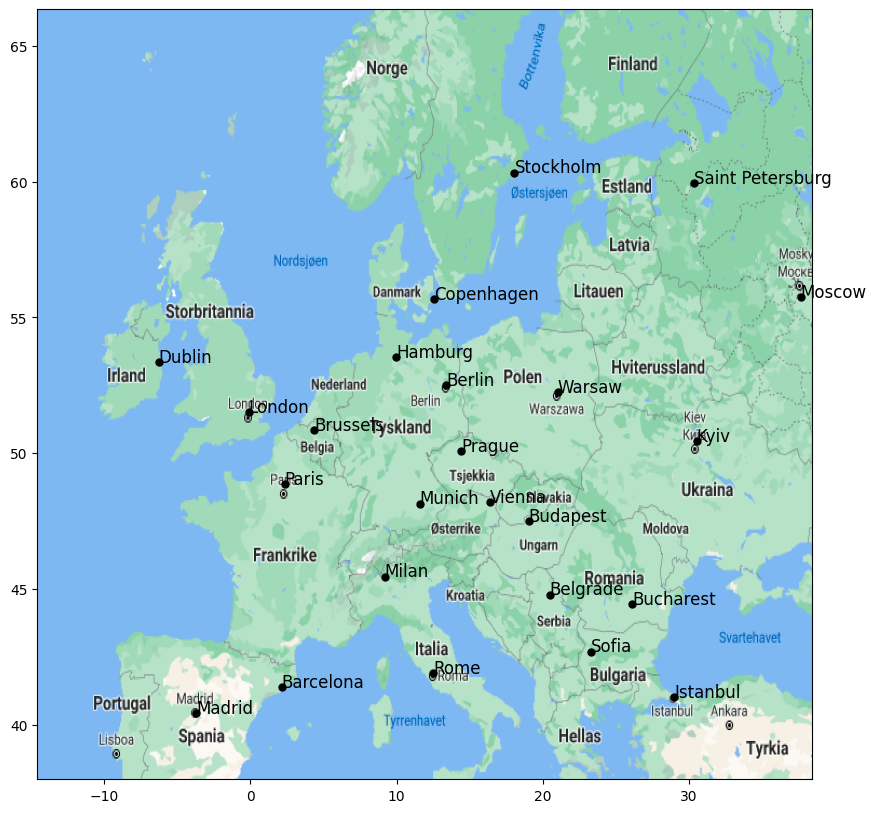

In [8]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [314]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


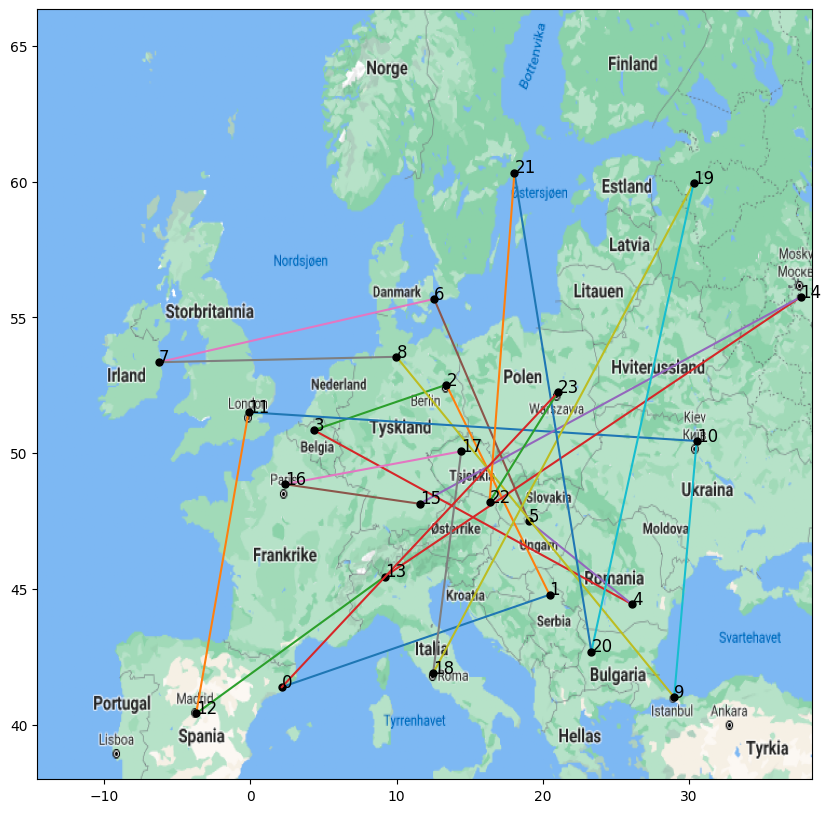

In [315]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

Beste rute: ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
Total distanse: 7486.31 km


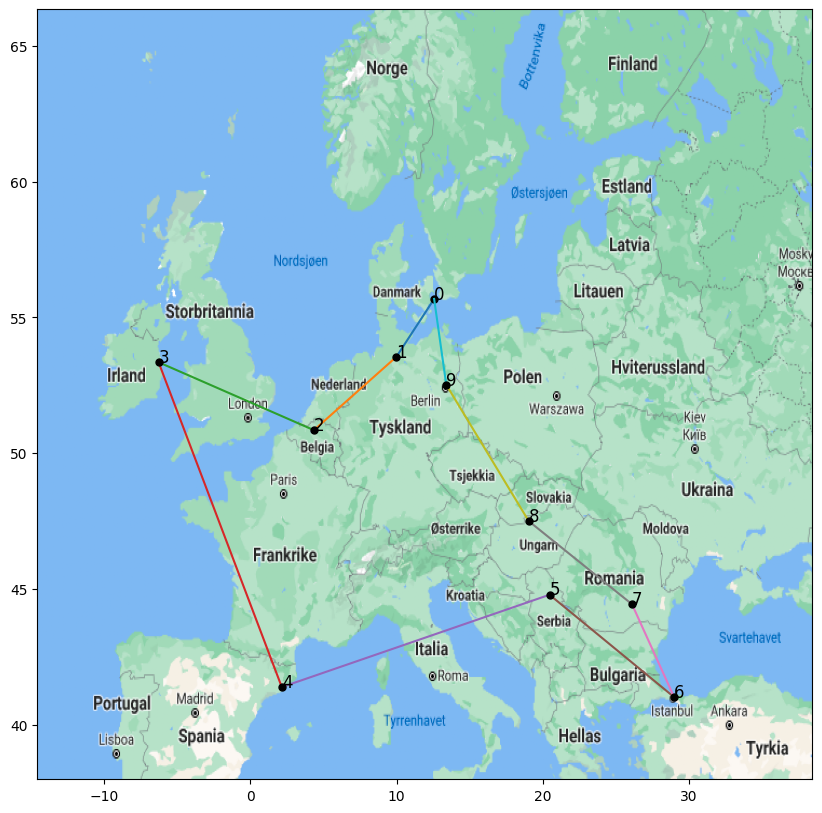

In [ ]:
import csv
from itertools import permutations

#Denne variabelen tar de x første byene i fila. 
antall_byer = 10

data = {}
with open("european_cities.csv", "r", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=";")
    header = next(reader)
    header = [col.strip() for col in header]
    for i, row in enumerate(reader):
        city = header[i]
        distances = {header[j]: float(row[j].strip()) for j in range(len(header))}
        data[city] = distances

alle_byer = header
tilfeldige_byer = alle_byer[:antall_byer]
#print("Byer i listen:", list(tilfeldige_byer))

def finn_rute_distanse(rute, distanser):
    total_distanse = 0
    for i in range(len(rute) - 1):
        total_distanse += distanser[rute[i]][rute[i+1]]
    total_distanse += distanser[rute[-1]][rute[0]]
    return total_distanse

def finn_korteste_rute(byer, distanser):
    korteste_distanse = float("inf")
    beste_rute = None
    for rute in permutations(byer):
        distanse = finn_rute_distanse(rute, distanser)
        if distanse < korteste_distanse:
            korteste_distanse = distanse
            beste_rute = rute
    return beste_rute, korteste_distanse

beste_rute, beste_distanse = finn_korteste_rute(tilfeldige_byer, data)
print(f"Beste rute: {beste_rute}")
print(f"Total distanse: {beste_distanse:.2f} km")
plot_plan(list(beste_rute))

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [ ]:
# Det korteste turen eg får blant de 10 første byene er 7486,31 kilometer. Programmet bruker 2,9 sekunder på å finne den kortaste ruten. 
# Usikker på om eg har rekna rett, men om eg delte 10! på 2.9 sek får eg 1 251 310 ruter i sekundet 
#Tok deretter 24! delt på talet over. Då har eg antall sekunder. Deretter delte eg på 60 og so 60 og so 24 og so 365 for å få år. Då fekk eg 15 722 954 150 år
#Dette viser at denne typen søk funker utmerket på mindre oppgaver for å finne det mest optimale svaret, men vil ta altfor lang tid når variablene i søket er mangen. 

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

Resultater for 10 byer (20 runs):
  Beste distanse: 7486.31 km
  Verste distanse: 8407.18 km
  Gjennomsnitt:  7628.23 km
  Standardavvik: 275.30 km

Plotter den beste ruten for 10 byer:


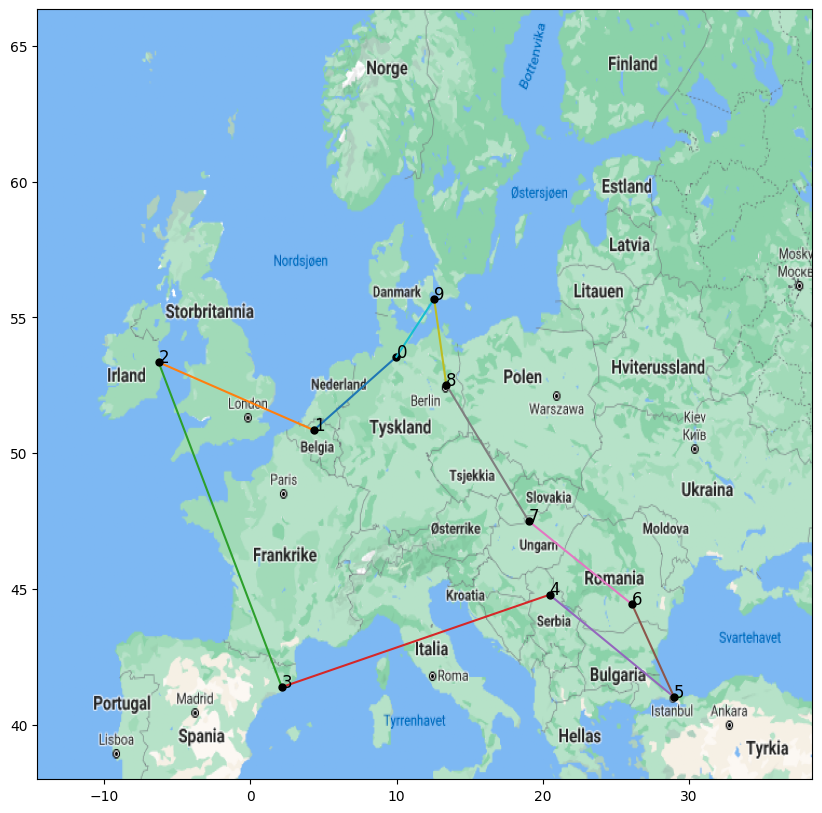


Resultater for 24 byer (20 runs):
  Beste distanse: 12334.35 km
  Verste distanse: 15765.68 km
  Gjennomsnitt:  14020.26 km
  Standardavvik: 905.40 km

Plotter den beste ruten for 24 byer:


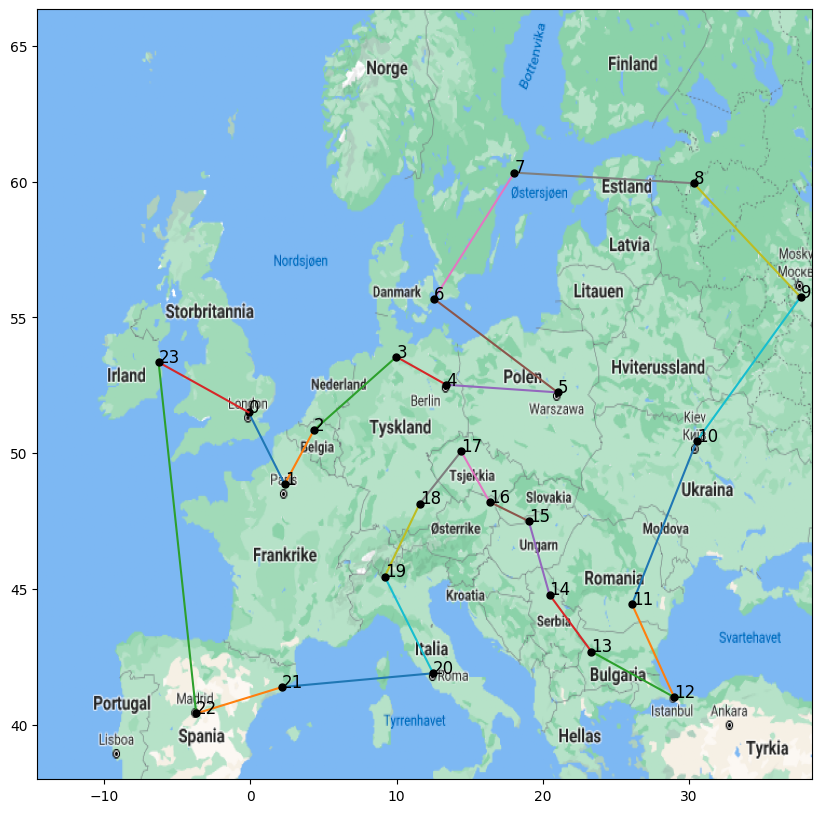

In [ ]:
import random
import statistics
alle_byer = header
x_naboer = 1000

def lag_nabo(rute):
    nabo= rute.copy()
    i, j = random.sample(range(len(rute)), 2)
    nabo[i], nabo[j]= nabo[j], nabo[i]
    return nabo

#Lager en sammenligner som lager x antall naboer og bytter om på beste rute om naboen er kortere
def sammenligner(rute):
    best_rute = rute
    best_dist = finn_rute_distanse(rute, data)
    for _ in range(x_naboer):
        nabo = lag_nabo(rute)
        nabo_dist = finn_rute_distanse(nabo, data)
        if nabo_dist < best_dist:
            best_rute = nabo
            best_dist = nabo_dist
    return best_rute
   

#Lager en while-loop som looper helt til sammenligner() ikke finner en nabo som er bedre. Da er current_rute den lokalt optimale ruten.    
def hill_climb(rute):
    current_rute = rute
    while True:
        next_rute = sammenligner(current_rute)
        if next_rute == current_rute:
            break
        current_rute = next_rute
    return current_rute

#beste_rute = hill_climb(tilfeldige_byer)
#print("Beste rute:", beste_rute)
#beste_distanse = finn_rute_distanse(beste_rute, data)
#print("Total distanse:", beste_distanse, "km")
#plot_plan(list(beste_rute))


def hill_climbs_test():
    runs = 20

    distances_10 = []
    turliste_10 = []
    for i in range(runs):
        
        byer_10 = header[:10].copy()
        random.shuffle(byer_10)
        
        best_tour = hill_climb(byer_10)
        tour_distance = finn_rute_distanse(best_tour, data)
        
        distances_10.append(tour_distance)
        turliste_10.append(best_tour)
        
    best_10 = min(distances_10)
    worst_10 = max(distances_10)
    mean_10 = statistics.mean(distances_10)
    std_10 = statistics.stdev(distances_10)
    
    print("Resultater for 10 byer (20 runs):")
    print("  Beste distanse: {:.2f} km".format(best_10))
    print("  Verste distanse: {:.2f} km".format(worst_10))
    print("  Gjennomsnitt:  {:.2f} km".format(mean_10))
    print("  Standardavvik: {:.2f} km".format(std_10))
    
    best_index_10 = distances_10.index(best_10)
    
    print("\nPlotter den beste ruten for 10 byer:")
    plot_plan(turliste_10[best_index_10])
    
    
    distances_24 = []
    turliste_24 = []
    for i in range(runs):
        byer_24 = header[:24].copy()
        random.shuffle(byer_24)
        
        best_tour = hill_climb(byer_24)
        tour_distance = finn_rute_distanse(best_tour, data)
        
        distances_24.append(tour_distance)
        turliste_24.append(best_tour)
    
    best_24 = min(distances_24)
    worst_24 = max(distances_24)
    mean_24 = statistics.mean(distances_24)
    std_24 = statistics.stdev(distances_24)
    
    print("\nResultater for 24 byer (20 runs):")
    print("  Beste distanse: {:.2f} km".format(best_24))
    print("  Verste distanse: {:.2f} km".format(worst_24))
    print("  Gjennomsnitt:  {:.2f} km".format(mean_24))
    print("  Standardavvik: {:.2f} km".format(std_24))
    
    best_index_24 = distances_24.index(best_24)
    
    print("\nPlotter den beste ruten for 24 byer:")
    plot_plan(turliste_24[best_index_24])


hill_climbs_test()


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

Populasjonsstørrelse 50:
  Beste rute-distanse: 12421.73 km
  Verste rute-distanse: 14007.45 km
  Gjennomsnitt: 13048.90 km
  Standardavvik: 482.33 km
Populasjonsstørrelse 100:
  Beste rute-distanse: 12287.07 km
  Verste rute-distanse: 13003.05 km
  Gjennomsnitt: 12606.44 km
  Standardavvik: 217.11 km
Populasjonsstørrelse 200:
  Beste rute-distanse: 12287.07 km
  Verste rute-distanse: 13383.28 km
  Gjennomsnitt: 12631.33 km
  Standardavvik: 317.14 km


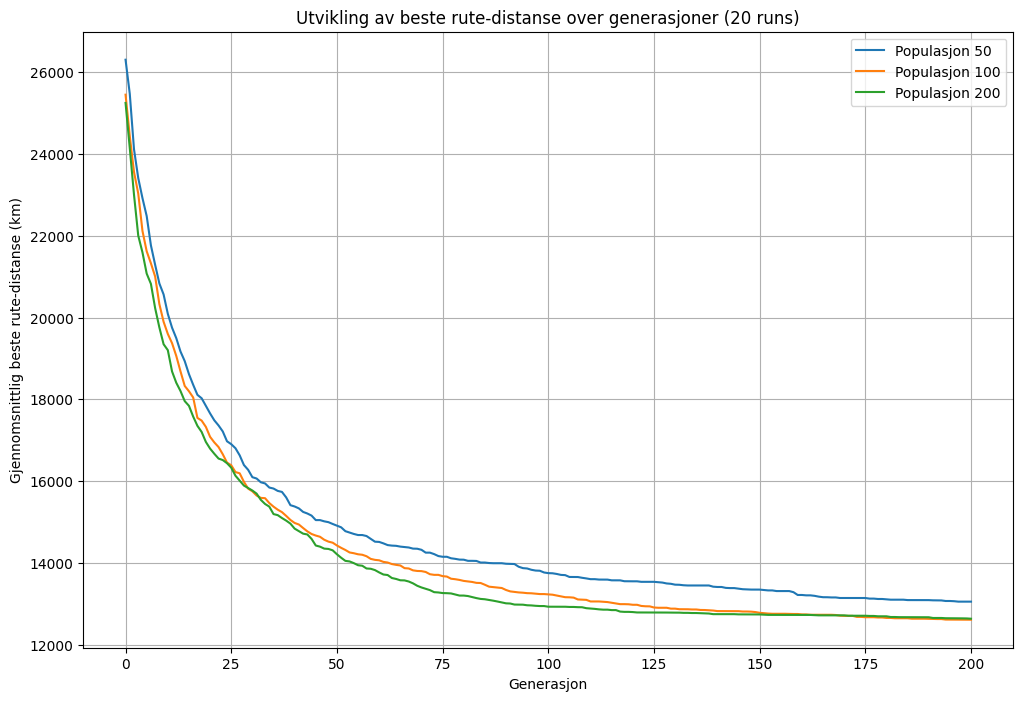

Beste rute for populasjon 50 (beste av 20 runs):


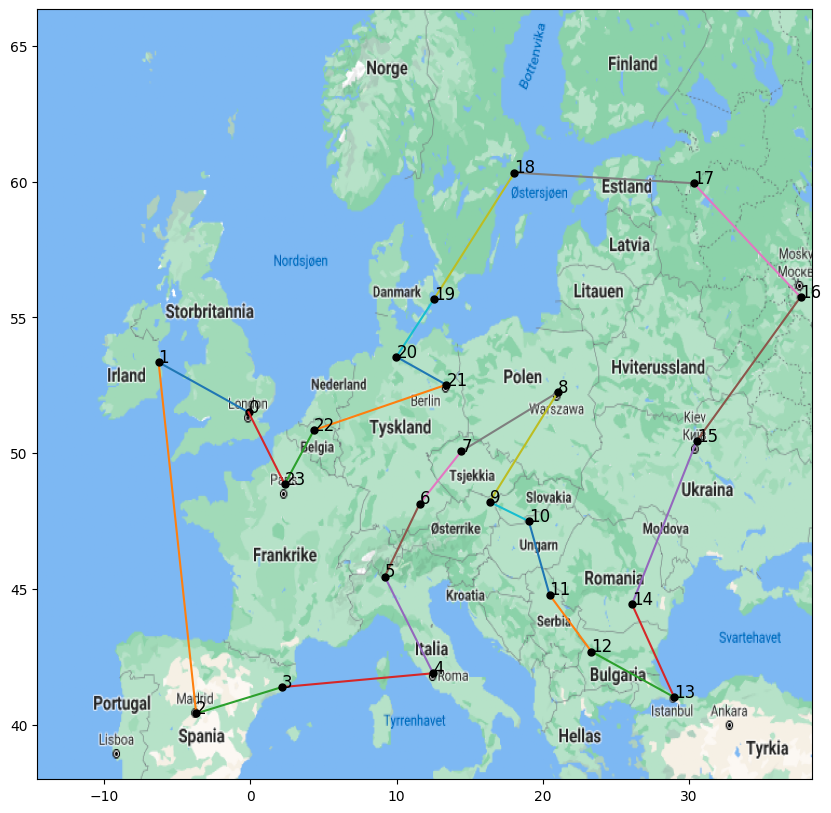

Beste rute for populasjon 100 (beste av 20 runs):


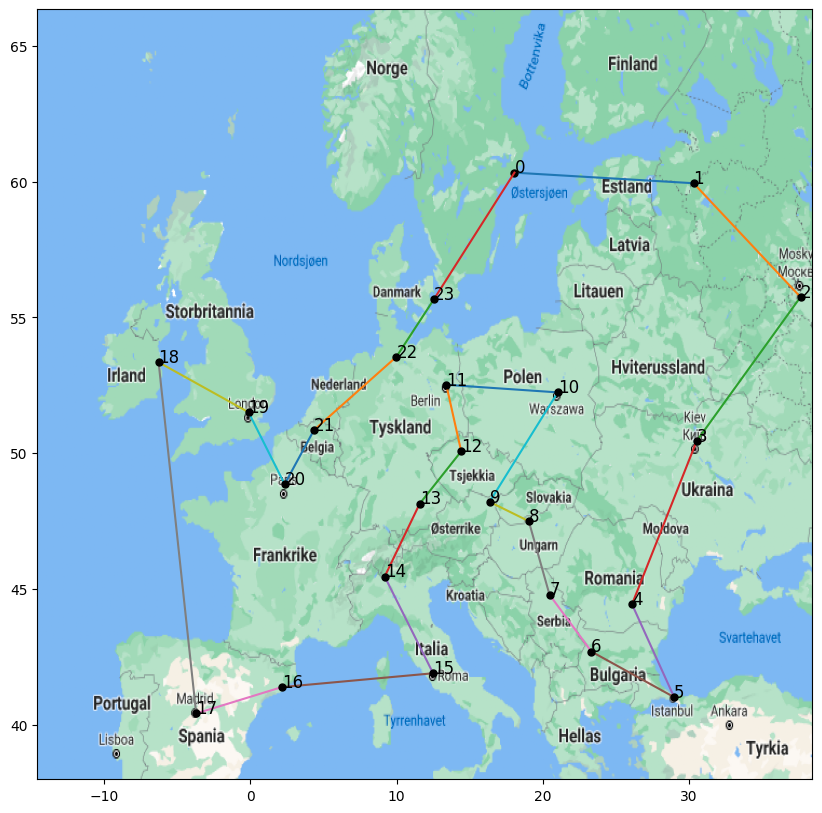

Beste rute for populasjon 200 (beste av 20 runs):


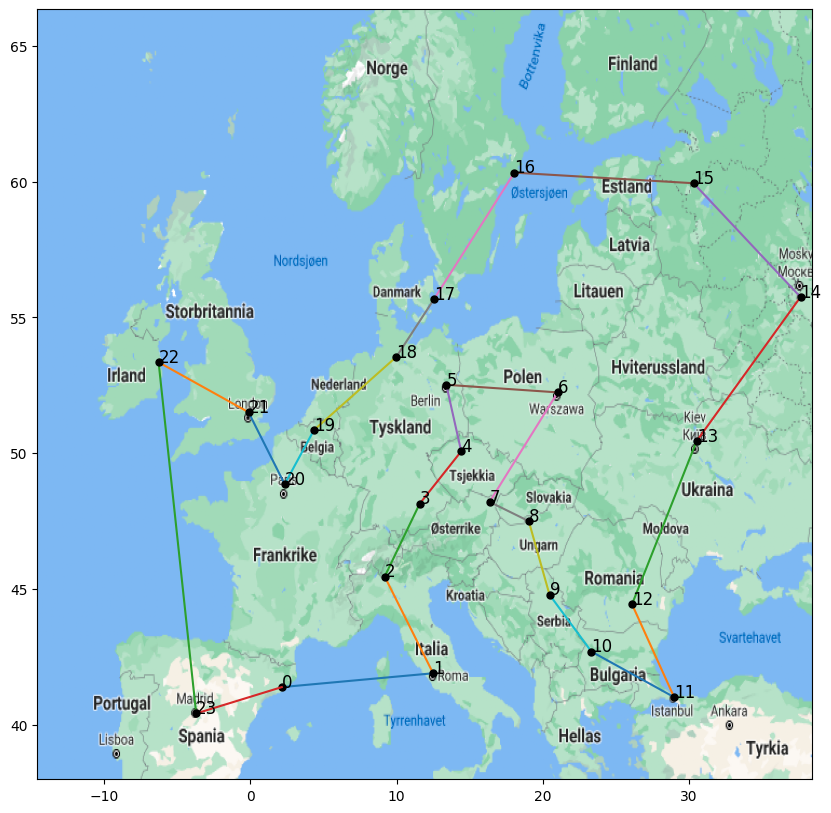

In [ ]:
import random
import matplotlib.pyplot as plt
import statistics

antall_byer = 24

def ordered_crossover(forelder1, forelder2):
    size = len(forelder1)
    start, slutt = sorted(random.sample(range(size), 2))
    barn = [None] * size
    barn[start:slutt+1] = forelder1[start:slutt+1]
    pos = (slutt + 1) % size
    for by in forelder2:
        if by not in barn:
            barn[pos] = by
            pos = (pos + 1) % size
    return barn


def swap_mutation(individ, mutasjons_rate):
    if random.random() < mutasjons_rate:
        i, j = random.sample(range(len(individ)), 2)
        individ[i], individ[j] = individ[j], individ[i]
    return individ


def tournament_selection(populasjon, tournament_size=3):
    kandidater = random.sample(populasjon, tournament_size)
    beste = min(kandidater, key=lambda rute: finn_rute_distanse(rute, data))
    return beste.copy()

#GA hovudalgoritme
def genetic_algorithm(populasjon_strl, generasjoner, mutasjons_rate, crossover_rate):
    populasjon = []
    for _ in range(populasjon_strl):
        rute = header[:antall_byer].copy()
        random.shuffle(rute)
        populasjon.append(rute)
    
    best_history = []
    best_individ = min(populasjon, key=lambda rute: finn_rute_distanse(rute, data))
    best_dist = finn_rute_distanse(best_individ, data)
    best_history.append(best_dist)
    
    for gen in range(generasjoner):
        ny_populasjon = []
        # Beholder det beste individet fra forrige generasjon
        ny_populasjon.append(best_individ.copy())
        while len(ny_populasjon) < populasjon_strl:
            forelder1 = tournament_selection(populasjon)
            forelder2 = tournament_selection(populasjon)
            if random.random() < crossover_rate:
                barn = ordered_crossover(forelder1, forelder2)
            else:
                barn = forelder1.copy()
            barn = swap_mutation(barn, mutasjons_rate)
            ny_populasjon.append(barn)
        populasjon = ny_populasjon
        best_individ = min(populasjon, key=lambda rute: finn_rute_distanse(rute, data))
        best_dist = finn_rute_distanse(best_individ, data)
        best_history.append(best_dist)
    
    return best_individ, best_dist, best_history

#Funksjonen eg brukte for å sjekke om alt funka før eg skulle lage funksjon med 20 runs og statistikk
#Blir ikkje brukt når du køyre koden 
def run_genetic_algorithm_variants():
    populasjon_strl_values = [50, 100, 200]  
    generasjoner = 5000          
    mutasjons_rate = 0.1      
    crossover_rate = 0.8       

    results = {}
    
    for pop in populasjon_strl_values:
        best_individ, best_dist, best_history = genetic_algorithm(pop, generasjoner, mutasjons_rate, crossover_rate)
        print("Populasjonsstørrelse {}: Beste rute-distanse: {:.2f} km".format(pop, best_dist))
        print("Plott av optimal rute for populasjon {}:".format(pop))
        plot_plan(best_individ)
        results[pop] = {
            "best_route": best_individ,
            "best_distance": best_dist,
            "best_history": best_history
        }
    
    return results


#run_genetic_algorithm_variants()


def run_genetic_algorithm_experiment():
    populasjon_strl_values = [50, 100, 200]  
    generasjoner = 200          
    mutasjons_rate = 0.2       
    crossover_rate = 0.8       

    results = {}
    
    # For kvar populasjonsstørrelse, køyres GA 20 ganger
    for pop in populasjon_strl_values:
        final_best_distances = []  
        best_history_runs = []     
        best_individ_list = []   
        
        for run in range(20):
            best_individ, best_dist, best_history = genetic_algorithm(pop, generasjoner, mutasjons_rate, crossover_rate)
            final_best_distances.append(best_dist)
            best_history_runs.append(best_history)
            best_individ_list.append(best_individ)
        
       
        best_run = min(final_best_distances)
        worst_run = max(final_best_distances)
        mean_run = statistics.mean(final_best_distances)
        std_run = statistics.stdev(final_best_distances)
        

        avg_best_history = []
        for g in range(generasjoner + 1):
            gen_values = [run_history[g] for run_history in best_history_runs]
            avg_best_history.append(statistics.mean(gen_values))
        
        results[pop] = {
            "final_best_distances": final_best_distances,
            "best_run": best_run,
            "worst_run": worst_run,
            "mean_run": mean_run,
            "std_run": std_run,
            "avg_best_history": avg_best_history,
            "best_individ_examples": best_individ_list
        }
        
        print(f"Populasjonsstørrelse {pop}:")
        print("  Beste rute-distanse: {:.2f} km".format(best_run))
        print("  Verste rute-distanse: {:.2f} km".format(worst_run))
        print("  Gjennomsnitt: {:.2f} km".format(mean_run))
        print("  Standardavvik: {:.2f} km".format(std_run))
        
    
    # Plot alle tre gjennomsnittlige fitness-kurvene
    plt.figure(figsize=(12, 8))
    for pop in populasjon_strl_values:
        avg_history = results[pop]["avg_best_history"]
        plt.plot(range(generasjoner + 1), avg_history, label=f'Populasjon {pop}')
    plt.ylabel('Gjennomsnittlig beste rute-distanse (km)')
    plt.xlabel('Generasjon')
    plt.title('Utvikling av beste rute-distanse over generasjoner (20 runs)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #Vise beste rute i kvar populasjojn
    for pop in populasjon_strl_values:
        final_distances = results[pop]["final_best_distances"]
        best_index = final_distances.index(min(final_distances))
        best_route = results[pop]["best_individ_examples"][best_index]
        print(f"Beste rute for populasjon {pop} (beste av 20 runs):")
        plot_plan(best_route)
    
    


run_genetic_algorithm_experiment()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
#Kjørte 20 runs på 200 generasjoner, og da kom alle 20 runs på alle tre populasjonsstørrelse frem til den beste løsningen. 
# #200 generasjoner var nok litt overkill, kunne kjørt typ 50 generasjoner for å fått et nesten like bra svar.

# Den genetiske algoritmen bruker mykje mindre tid enn exhaustive søk for kvart run. Sjølve koden bruker ca 1 minutt på 10 byer, altså ca 50 sekunder tregare enn exhaustive søk, men den har 20 runs og tre ulike størrelsar.  
#På 24 byer er sjølvsagt GA mykje raskere ettersom Exhaustive søk "aldri" vil bli ferdig. 

#Det er vanskeleg å sei eksakt kor mykje turar det er i GA, men samanlikna med exhaustive søk er det mykje mindre i GA. Dette er en sjølvfølge ettersom exhaustive søk sjekkar alle moglege turar, noko GA ikkje gjer. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 3)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameterverdier for de ulike funksjonene:
# Perfekte komplementer og Cobb-Douglas:
m = 100    # Inntekt
p = 5      # Pris på strøm uten støtte
a = 0.3    # Vektparameter, 0 < a < 1
q = 1      # Enhetsstøtte

# For perfekte substitutter, velg andre verdier for a
a_sub = 0.9  # For perfekte substitutter

# ===== 1. Perfekte komplementer (u(e,x) = min{a*e, (1-a)*x}) =====

# Budsjettlinjer:
# Opprinnelig: p*e + x = m   ->   x = m - p*e
# Enhetsstøtte: (p-q)*e + x = m   ->   x = m - (p-q)*e
# For direkte overføring:
#   Bestem først enhetsstøtte-optimum:
e_comp_unit = m / ((p - q) + a/(1 - a))
x_comp_unit = (a/(1 - a)) * e_comp_unit
s_comp = q * e_comp_unit  # direkte overføringsstøtte
m_comp_dt = m + s_comp
# Direkte overføring: p*e + x = m + s  -> x = (m+s) - p*e

# Opprinnelig optimum for perfekte komplementer:
e_comp_orig = m / (p + a/(1 - a))
x_comp_orig = (a/(1 - a)) * e_comp_orig

# e-verdier for plotting
e_vals_orig = np.linspace(0, m/p, 100)
e_vals_unit = np.linspace(0, m/(p - q), 100)
e_vals_dt = np.linspace(0, m_comp_dt/p, 100)

x_orig = m - p*e_vals_orig
x_unit = m - (p - q)*e_vals_unit
x_dt = m_comp_dt - p*e_vals_dt

# For perfekte komplementer er indifferenskurven L-formet med knekk ved x = (a/(1-a))*e.
# Vi tegner en "veiledende" linje for knekkpunktet.
e_line = np.linspace(0, m/(p - q), 100)
x_kink = (a/(1 - a)) * e_line

plt.figure(figsize=(8,6))
plt.plot(e_vals_orig, x_orig, label='Opprinnelig budsjettlinje')
plt.plot(e_vals_unit, x_unit, label='Enhetsstøtte: (p-q)e+x=m')
plt.plot(e_vals_dt, x_dt, label='Direkte overføring: p*e+x=m+s')

# Tegn L-formen for indifferenskurven (kun som veiledning)
# Vi plukker optimalpunktene for å vise knekket.
plt.plot([e_comp_orig, e_comp_orig], [0, x_comp_orig], 'k--', lw=1)
plt.plot([0, e_comp_orig], [x_comp_orig, x_comp_orig], 'k--', lw=1)
plt.text(e_comp_orig+0.5, x_comp_orig, 'Oppr. optimum', fontsize=9)
plt.plot(e_comp_unit, x_comp_unit, 'ro', label='Optimum med støtte')

plt.xlabel('Strømforbruk, e')
plt.ylabel('Forbruk av andre varer, x')
plt.title('Perfekte komplementer: Budsjettlinjer før og etter støtte')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ===== 2. Cobb-Douglas (v(e,x) = a ln(e) + (1-a) ln(x)) =====

# Budsjettlinjer:
# Opprinnelig: x = m - p*e, med e ∈ [0, m/p]
# Enhetsstøtte: x = m - (p-q)*e, med e ∈ [0, m/(p-q)]
# Direkte overføring: x = (m+s) - p*e, der s = q*e_unit (her e_unit er optimum med enhetsstøtte for CD)

e_cd_orig = (a * m) / p
x_cd_orig = (1 - a) * m

e_cd_unit = (a * m) / (p - q)   # fordi med CD fordeles budsjettet i faste andeler
x_cd_unit = (1 - a) * m

s_cd = q * e_cd_unit
m_cd_dt = m + s_cd
e_cd_dt = (a * m_cd_dt) / p
x_cd_dt = (1 - a) * m_cd_dt

# Generer e-verdier for plotting
e_vals_orig = np.linspace(0, m/p, 100)
e_vals_unit = np.linspace(0, m/(p - q), 100)
e_vals_dt = np.linspace(0, m_cd_dt/p, 100)

x_vals_orig = m - p * e_vals_orig
x_vals_unit = m - (p - q) * e_vals_unit
x_vals_dt = m_cd_dt - p * e_vals_dt

plt.figure(figsize=(8,6))
plt.plot(e_vals_orig, x_vals_orig, label='Opprinnelig budsjettlinje')
plt.plot(e_vals_unit, x_vals_unit, label='Enhetsstøtte: (p-q)e+x=m')
plt.plot(e_vals_dt, x_vals_dt, label='Direkte overføring: p*e+x=(m+s)')

# Marker optimum:
plt.plot(e_cd_orig, x_cd_orig, 'bo', label='Oppr. optimum')
plt.plot(e_cd_unit, x_cd_unit, 'ro', label='Optimum med enhetsstøtte')
plt.plot(e_cd_dt, x_cd_dt, 'go', label='Optimum med direkte overføring')

plt.xlabel('Strømforbruk, e')
plt.ylabel('Forbruk av andre varer, x')
plt.title('Cobb-Douglas: Budsjettlinjer før og etter støtte')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ===== 3. Perfekte substitutter (w(e,x)= a*e + (1-a)x) =====
# For perfekte substitutter bestemmes valget av forholdet mellom nytte per krone:
# Hvis a/p > 1-a, kjøpes kun e. Med valgte parametere for substitutter settes:
m_sub = 100
p_sub = 5
q_sub = 1  # Enhetsstøtte
a_sub = 0.9  # For at strøm skal være det foretrukne godet

# Sjekk betingelsen:
if (a_sub / p_sub) > (1 - a_sub):
    # Konsumenten velger kun e.
    e_ps_orig = m_sub / p_sub
    x_ps_orig = 0
    e_ps_unit = m_sub / (p_sub - q_sub)
    x_ps_unit = 0
    s_ps = q_sub * e_ps_unit
    m_ps_dt = m_sub + s_ps
    e_ps_dt = m_ps_dt / p_sub
    x_ps_dt = 0
else:
    # Hvis den andre varen foretrekkes
    e_ps_orig = 0
    x_ps_orig = m_sub
    e_ps_unit = 0
    x_ps_unit = m_sub
    s_ps = 0
    m_ps_dt = m_sub
    e_ps_dt = 0
    x_ps_dt = m_sub

# Budsjettlinjer for perfekte substitutter:
e_vals_orig = np.linspace(0, m_sub / p_sub, 100)
e_vals_unit = np.linspace(0, m_sub / (p_sub - q_sub), 100)
e_vals_dt = np.linspace(0, m_ps_dt / p_sub, 100)

x_vals_orig = m_sub - p_sub * e_vals_orig
x_vals_unit = m_sub - (p_sub - q_sub) * e_vals_unit
x_vals_dt = m_ps_dt - p_sub * e_vals_dt

plt.figure(figsize=(8,6))
plt.plot(e_vals_orig, x_vals_orig, label='Opprinnelig budsjettlinje')
plt.plot(e_vals_unit, x_vals_unit, label='Enhetsstøtte: (p-q)e+x=m')
plt.plot(e_vals_dt, x_vals_dt, label='Direkte overføring: p*e+x=(m+s)')

# Marker hjørneløsningen:
plt.plot(e_ps_orig, x_ps_orig, 'bo', label='Oppr. optimum (kun e)')
plt.plot(e_ps_unit, x_ps_unit, 'ro', label='Optimum med enhetsstøtte')
plt.plot(e_ps_dt, x_ps_dt, 'go', label='Optimum med direkte overføring')

plt.xlabel('Strømforbruk, e')
plt.ylabel('Forbruk av andre varer, x')
plt.title('Perfekte substitutter: Budsjettlinjer før og etter støtte')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()